In [22]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [26]:
train_path = 'C:/Users/DELL/Downloads/Face recognition/dataset/train/'
valid_path = 'C:/Users/DELL/Downloads/Face recognition/dataset/val/'

In [27]:
# add preprocessing layer to the front of VGG
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in mobilenet.layers:
  layer.trainable = False

In [28]:
# useful for getting number of classes
folders = glob('C:/Users/DELL/Downloads/Face recognition/dataset/train/*')
  

In [30]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [32]:
# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [33]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [34]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/DELL/Downloads/Face recognition/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/DELL/Downloads/Face recognition/dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [36]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
3/3 [==============================] - 5s 2s/step - loss: 0.3698 - accuracy: 0.9462 - val_loss: 1.6173 - val_accuracy: 0.8000
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.2184 - val_accuracy: 0.8000
Epoch 3/5
3/3 [==============================] - 7s 2s/step - loss: 7.3924e-04 - accuracy: 1.0000 - val_loss: 1.3704 - val_accuracy: 0.7600
Epoch 4/5
3/3 [==============================] - 6s 2s/step - loss: 1.7464e-04 - accuracy: 1.0000 - val_loss: 1.6228 - val_accuracy: 0.7200
Epoch 5/5
3/3 [==============================] - 13s 5s/step - loss: 0.1196 - accuracy: 0.9785 - val_loss: 1.3536 - val_accuracy: 0.8000


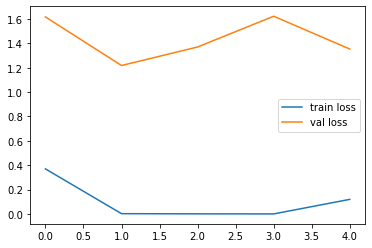

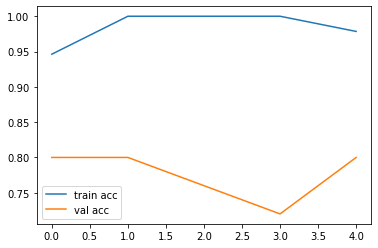

<Figure size 432x288 with 0 Axes>

In [37]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
import tensorflow as tf

from keras.models import load_model

model.save('C:/Users/DELL/Downloads/Face recognition/MobileNet_FR.h5')

classifier = load_model('MobileNet_FR.h5')

In [ ]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

monkey_breeds_dict = {"[0]": "ben_afflek", 
                      "[1]": "elton_john",
                      "[2]": "jerry_seinfeld",
                      "[3]": "madonna",
                      "[4]": "mindy_kaling",
                      
                     }

monkey_breeds_dict_n = {"ben_afflek": "ben_afflek", 
                      "elton_john": "elton_john",
                     "jerry_seinfeld" : "jerry_seinfeld",
                        "madonna":"madonna",
                        "mindy_kaling" : "mindy_kaling",
                      }

def draw_test(name, pred, im):
    monkey = monkey_breeds_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, monkey, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + monkey_breeds_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)    

for i in range(0,5):
    input_im = getRandomImage("dataset/val/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()